<a href="https://colab.research.google.com/github/HolyBayes/HSE_Intro2DL2021/blob/master/hometasks/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Подготовка данных (1 балл)

Данные представляют собой набор первых 10 букв от A до J латинского алфавита (каждая буква - класс), написанных разными шрифтами. Ваша задача - написать классификатор для этих данных, определяющий буквы на изображении

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
!tar -xvf notMNIST_large.tar.gz >> /dev/null

--2021-02-02 23:12:32--  http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247336696 (236M) [application/x-gzip]
Saving to: ‘notMNIST_large.tar.gz.5’

notMNIST_large.tar. 100%[===================>] 235.88M  72.3MB/s    in 3.5s    

2021-02-02 23:12:36 (67.1 MB/s) - ‘notMNIST_large.tar.gz.5’ saved [247336696/247336696]



In [2]:
DATA_DIR = 'notMNIST_large/'

In [3]:
from glob import glob
from PIL import Image
import os

for img_path in glob(f'{DATA_DIR}/**/*.png'):
  try:
    img = Image.open(img_path)
  except:
    os.remove(img_path)

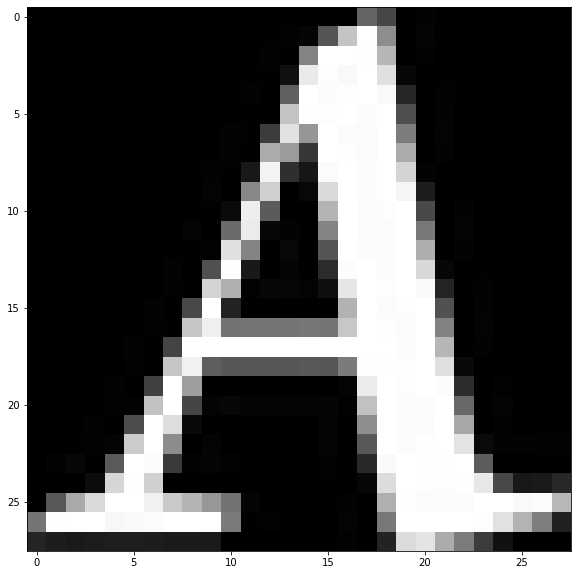

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(17,10))
letter = 'A'
img = cv2.imread(os.path.join(DATA_DIR, letter, os.listdir(f'{DATA_DIR}/{letter}/')[0]))
plt.imshow(img)

# Модель (3 балла)

In [5]:
import os
import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers.core import Activation, Reshape, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling2D, GlobalMaxPool2D
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU

n_classes = len(os.listdir(DATA_DIR))

#https://www.youtube.com/watch?v=oOSXQP7C7ck
#Индус, который помог сделать домашку)
#на курсесе лаба - топчик


model = Sequential()
model.add(
    Conv2D(
        filters=8,
        kernel_size=(3, 3), 
        padding="same", 
        input_shape=(28, 28, 1))
    )

model.add(LeakyReLU(0.15))
#***

model.add(
    MaxPool2D(
        pool_size=(2, 2))
    )
model.add(Dropout(0.4))  
#***

model.add(
    MaxPool2D(
        pool_size=(2, 2))
    )
model.add(LeakyReLU(0.17))   
#***

model.add(
    Conv2D(
        filters=32, 
        kernel_size=(3, 3),
        padding="same"
        )
    )
model.add(LeakyReLU(0.15))
#***
                                 
model.add(
    Conv2D(
        filters=64, 
        kernel_size=(3, 3), 
        padding="same")
)              
model.add(LeakyReLU(0.12))
#***

model.add(
    MaxPool2D(
        pool_size=(2, 2))
    )
model.add(LeakyReLU(0.17))
#***

model.add(
    Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        padding="same"))
model.add(LeakyReLU(0.3))


model.add(
    MaxPool2D(
        pool_size=(2, 2))
    )

model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding="same"))
model.add(LeakyReLU(0.1))

model.add(Flatten())
model.add(Dense(4096))
model.add(LeakyReLU(0.27))    



#########################################  ИТОГ ВЫВОД                           
model.add(Dense(n_classes))
model.add(Activation("softmax"))

# Аугментация данных (3 балла)

train/val split должен быть 9/1 !

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# Подсказка: train/val split удобно делать вот так https://stackoverflow.com/questions/53037510/can-flow-from-directory-get-train-and-validation-data-from-the-same-directory-in (самый залайканый ответ)

""" Data generators initialization: for train and validation sets """
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.07,
    validation_split=0.1
    )

train_generator = train_datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(28, 28), 
    color_mode='grayscale', 
    subset='training', 
    seed=55
    )

valid_datagen =  ImageDataGenerator(
    validation_split=0.1
    )

valid_generator = valid_datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(28, 28), 
    color_mode='grayscale', 
    subset='validation', 
    seed=55
    )

Found 476205 images belonging to 10 classes.
Found 52909 images belonging to 10 classes.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          2

# Обучение модели

val_accuracy > 0.85 - 1 балл

val_accuracy > 0.88 - 2 балла

val_accuracy > 0.91 - 3 балла

val_accuracy > 0.92 - 4 балла


**Максимальный суммарный балл** - 11

**Финальная оценка**: min(суммарный балл, 10)


In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

step_size_train = (train_generator.n // train_generator.batch_size)
step_size_valid = (valid_generator.n // valid_generator.batch_size)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adamax(lr=1e-3), metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=4,
    validation_data=valid_generator,
    validation_steps=step_size_valid,
)

Epoch 1/4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


14881/14881 [==============================] - 228s 15ms/step - loss: 0.5811 - accuracy: 0.8225 - val_loss: 13.8407 - val_accuracy: 0.9107
Epoch 2/4
14881/14881 [==============================] - 225s 15ms/step - loss: 0.3496 - accuracy: 0.8916 - val_loss: 15.5684 - val_accuracy: 0.9142
Epoch 3/4
14881/14881 [==============================] - 227s 15ms/step - loss: 0.3215 - accuracy: 0.8999 - val_loss: 14.6225 - val_accuracy: 0.9168
Epoch 4/4
14881/14881 [==============================] - 228s 15ms/step - loss: 0.3042 - accuracy: 0.9049 - val_loss: 14.9349 - val_accuracy: 0.9200
